In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
from reg_utils import sigmoid, relu, plot_decision_boundary, initialize_parameters, load_2D_dataset, predict_dec
from reg_utils import compute_cost, predict, forward_propagation, backward_propagation, update_parameters
import sklearn
import sklearn.datasets
import scipy.io

%matplotlib inline
plt.rcParams['figure.figsize'] = (7.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

C:\Users\xunyi\Desktop\Untitled Folder\reg_utils.py:68: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], layer_dims[l-1])
C:\Users\xunyi\Desktop\Untitled Folder\reg_utils.py:69: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(parameters['W' + str(l)].shape == layer_dims[l], 1)
C:\Users\xunyi\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


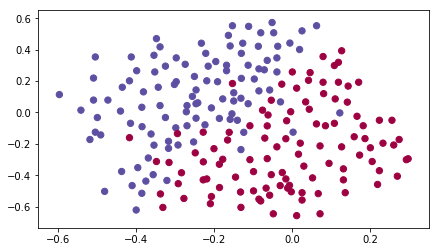

In [2]:
train_X, train_Y, test_X, test_Y = load_2D_dataset()

In [3]:
def model(X, Y, learning_rate = 0.3, num_iterations = 30000, print_cost = True, lambd = 0, keep_prob = 1):
    """
    Implements a three-layer neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SIGMOID.

    Arguments:
    X -- input data, of shape (input size, number of examples)
    Y -- true "label" vector (1 for blue dot / 0 for red dot), of shape (output size, number of examples)
    learning_rate -- learning rate of the optimization
    num_iterations -- number of iterations of the optimization loop
    print_cost -- If True, print the cost every 10000 iterations
    lambd -- regularization hyperparameter, scalar
    keep_prob - probability of keeping a neuron active during drop-out, scalar.

    Returns:
    parameters -- parameters learned by the model. They can then be used to predict.
    """

    grads = {}
    costs = []                            # to keep track of the cost
    m = X.shape[1]                        # number of examples
    layers_dims = [X.shape[0], 20, 3, 1]

    # Initialize parameters dictionary.
    parameters = initialize_parameters(layers_dims)

    # Loop (gradient descent)

    for i in range(0, num_iterations):

        # Forward propagation: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SIGMOID.
        if keep_prob == 1:
            a3, cache = forward_propagation(X, parameters)
        elif keep_prob < 1:
            a3, cache = forward_propagation_with_dropout(X, parameters, keep_prob)

        # Cost function
        if lambd == 0:
            cost = compute_cost(a3, Y)
        else:
            cost = compute_cost_with_regularization(a3, Y, parameters, lambd)

        # Backward propagation.
        assert(lambd==0 or keep_prob==1)    # it is possible to use both L2 regularization and dropout, 
                                            # but this assignment will only explore one at a time
        if lambd == 0 and keep_prob == 1:
            grads = backward_propagation(X, Y, cache)
        elif lambd != 0:
            grads = backward_propagation_with_regularization(X, Y, cache, lambd)
        elif keep_prob < 1:
            grads = backward_propagation_with_dropout(X, Y, cache, keep_prob)

        # Update parameters.
        parameters = update_parameters(parameters, grads, learning_rate)

        # Print the loss every 10000 iterations
        if print_cost and i % 10000 == 0:
            print("Cost after iteration {}: {}".format(i, cost))
        if print_cost and i % 1000 == 0:
            costs.append(cost)

    # plot the cost
    plt.plot(costs)
    plt.ylabel('cost')
    plt.xlabel('iterations (x1,000)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    return parameters

Cost after iteration 0: 0.6557412523481002
Cost after iteration 10000: 0.1632998752572419
Cost after iteration 20000: 0.13851642423239133


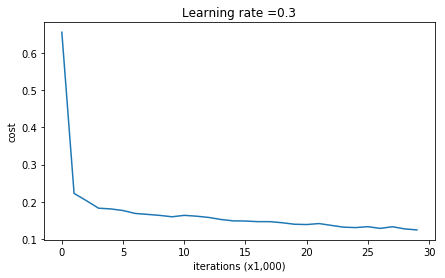

On the training set:
Accuracy: 0.9478672985781991
On the test set:
Accuracy: 0.915


In [4]:
parameters = model(train_X, train_Y)
print ("On the training set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)

the input shape(93960, 2)


ValueError: c of shape (1, 211) not acceptable as a color sequence for x with size 211, y with size 211

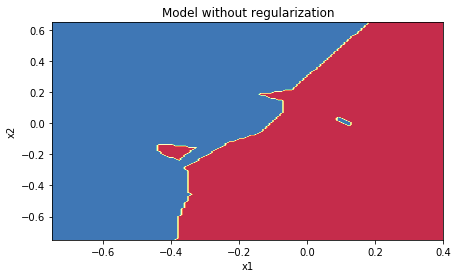

In [6]:
plt.title("Model without regularization")
axes = plt.gca()
axes.set_xlim([-0.75,0.40])
axes.set_ylim([-0.75,0.65])
plot_decision_boundary(lambda x: predict_dec(parameters, x.T), train_X, train_Y)

In [7]:
# GRADED FUNCTION: compute_cost_with_regularization
#L2正则化

def compute_cost_with_regularization(A3, Y, parameters, lambd):
    """
    Implement the cost function with L2 regularization. See formula (2) above.

    Arguments:
    A3 -- post-activation, output of forward propagation, of shape (output size, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    parameters -- python dictionary containing parameters of the model

    Returns:
    cost - value of the regularized loss function (formula (2))
    """
    m = Y.shape[1]
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]

    cross_entropy_cost = compute_cost(A3, Y) # This gives you the cross-entropy part of the cost

    ### START CODE HERE ### (approx. 1 line)
    L2_regularization_cost = (1./m*lambd/2)*(np.sum(np.square(W1)) + np.sum(np.square(W2)) + np.sum(np.square(W3)))
    ### END CODER HERE ###

    cost = cross_entropy_cost + L2_regularization_cost

    return cost

In [12]:
def backward_propagation_with_regularization(X,Y,caches,lamda):   #这个函数对于多层神经网络均适用
    L=len(caches)//4
    cache={}
    m=X.shape[1]
    grads={}
    for i in range(0,L):
        cache["Z"+str(i+1)]=caches[i*4]
        cache["A"+str(i+1)]=caches[i*4+1]
        cache["W"+str(i+1)]=caches[i*4+2]
        cache["b"+str(i+1)]=caches[i*4+3]
    grads["dZ"+str(L)]=cache["A"+str(L)]-Y
    grads["dW"+str(L)]=(1.0/m)*np.dot(grads["dZ"+str(L)],cache["A"+str(L-1)].T)+np.float(lamda/m)*cache["W"+str(L)]
    grads["db"+str(L)]=(1.0/m)*np.sum(grads["dZ"+str(L)],axis=1,keepdims=True)
    grads["dA"+str(L-1)]=np.dot(cache["W"+str(L)].T,grads["dZ"+str(L)])
    for l in reversed(range(1,L)):
        if l > 1:
            grads["dZ"+str(l)]=np.multiply(grads["dA"+str(l)],np.int64(cache["A"+str(l)]>0))
 #       grads["dW"+str(l)]=cache["A"+str(L)]-Y
            grads["dW"+str(l)]=(1.0/m)*np.dot(grads["dZ"+str(l)],cache["A"+str(l-1)].T)+np.float(lamda/m)*cache["W"+str(l)]
            grads["db"+str(l)]=(1.0/m)*np.sum(grads["dZ"+str(l)],axis=1,keepdims=True)
            grads["dA"+str(l-1)]=np.dot(cache["W"+str(l)].T,grads["dZ"+str(l)])
        elif l==1:
            grads["dZ"+str(1)]=np.multiply(grads["dA"+str(1)],np.int64(cache["A"+str(1)]>0))
            grads["dW"+str(1)]=(1.0/m)*np.dot(grads["dZ"+str(1)],X.T)+np.float(lamda/m)*cache["W"+str(1)]
            grads["db"+str(1)]=(1.0/m)*np.sum(grads["dZ"+str(1)],axis=1,keepdims=True)
    return grads

Cost after iteration 0: 0.6974484493131264
Cost after iteration 10000: 0.2684918873282239
Cost after iteration 20000: 0.2680916337127301


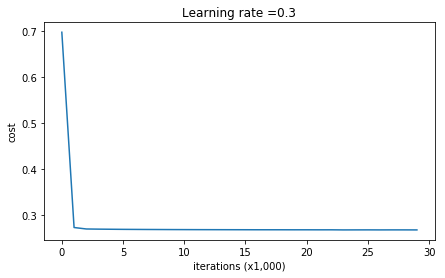

On the train with regularization
Accuracy: 0.9383886255924171
On the test with regularization
Accuracy: 0.93
the input shape(93960, 2)


ValueError: c of shape (1, 211) not acceptable as a color sequence for x with size 211, y with size 211

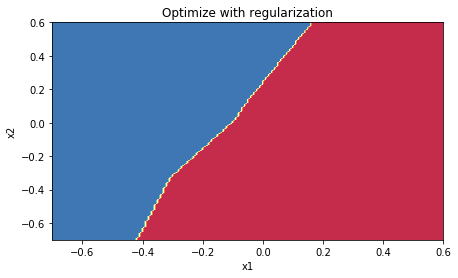

In [17]:
parameters_with_regularization=model(train_X,train_Y,learning_rate=0.3,num_iterations=30000,print_cost=True,lambd=0.7,keep_prob=1)
print("On the train with regularization")
train_prediction_regularization=predict(train_X,train_Y,parameters_with_regularization)

print ("On the test with regularization")
test_prediction_regularization=predict(test_X,test_Y,parameters_with_regularization)

plt.title("Optimize with regularization")
axes=plt.gca()
axes.set_xlim([-0.7,0.6])
axes.set_ylim([-0.7,0.6])
plot_decision_boundary(lambda x: predict_dec(parameters_with_regularization,x.T),train_X,train_Y)

In [22]:
# GRADED FUNCTION: backward_propagation_with_dropout

def backward_propagation_with_dropout(X, Y, cache, keep_prob):
    """
    Implements the backward propagation of our baseline model to which we added dropout.

    Arguments:
    X -- input dataset, of shape (2, number of examples)
    Y -- "true" labels vector, of shape (output size, number of examples)
    cache -- cache output from forward_propagation_with_dropout()
    keep_prob - probability of keeping a neuron active during drop-out, scalar

    Returns:
    gradients -- A dictionary with the gradients with respect to each parameter, activation and pre-activation variables
    """

    m = X.shape[1]
    (Z1, D1, A1, W1, b1, Z2, D2, A2, W2, b2, Z3, A3, W3, b3) = cache

    dZ3 = A3 - Y
    dW3 = 1./m * np.dot(dZ3, A2.T)
    db3 = 1./m * np.sum(dZ3, axis=1, keepdims = True)
    dA2 = np.dot(W3.T, dZ3)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA2 = dA2 * D2              # Step 1: Apply mask D2 to shut down the same neurons as during the forward propagation
    dA2 = dA2 / keep_prob           # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ2 = np.multiply(dA2, np.int64(A2 > 0))
    dW2 = 1./m * np.dot(dZ2, A1.T)
    db2 = 1./m * np.sum(dZ2, axis=1, keepdims = True)

    dA1 = np.dot(W2.T, dZ2)
    ### START CODE HERE ### (≈ 2 lines of code)
    dA1 = dA1 * D1              # Step 1: Apply mask D1 to shut down the same neurons as during the forward propagation
    dA1 = dA1 / keep_prob             # Step 2: Scale the value of neurons that haven't been shut down
    ### END CODE HERE ###
    dZ1 = np.multiply(dA1, np.int64(A1 > 0))
    dW1 = 1./m * np.dot(dZ1, X.T)
    db1 = 1./m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {"dZ3": dZ3, "dW3": dW3, "db3": db3,"dA2": dA2,
                 "dZ2": dZ2, "dW2": dW2, "db2": db2, "dA1": dA1, 
                 "dZ1": dZ1, "dW1": dW1, "db1": db1}

    return gradients

Cost after iteration 0: 0.6543912405149825


C:\Users\xunyi\Desktop\Untitled Folder\reg_utils.py:201: RuntimeWarning: divide by zero encountered in log
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)
C:\Users\xunyi\Desktop\Untitled Folder\reg_utils.py:201: RuntimeWarning: invalid value encountered in multiply
  logprobs = np.multiply(-np.log(a3),Y) + np.multiply(-np.log(1 - a3), 1 - Y)


Cost after iteration 10000: 0.061016986574905605
Cost after iteration 20000: 0.060582435798513114


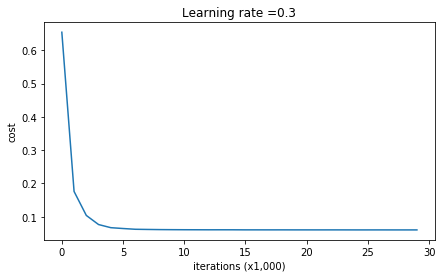

On the train set:
Accuracy: 0.9289099526066351
On the test set:
Accuracy: 0.95


In [25]:
parameters = model(train_X, train_Y, keep_prob = 0.86, learning_rate = 0.3)

print ("On the train set:")
predictions_train = predict(train_X, train_Y, parameters)
print ("On the test set:")
predictions_test = predict(test_X, test_Y, parameters)
#用了dropout正则化的结果，测试集精度较高。